# **House price prediction**

In [575]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from folium.plugins import HeatMap, MarkerCluster
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
from sklearn import tree
from matplotlib import pyplot as plt


In [576]:
#importing the dataset
mumbai = pd.read_csv('/content/Mumbai.csv')
delhi = pd.read_csv('/content/Delhi.csv')

In [577]:
mumbai.head()


,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [578]:
delhi.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [579]:
mumbai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7719 entries, 0 to 7718
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                7719 non-null   int64 
 1   Area                 7719 non-null   int64 
 2   Location             7719 non-null   object
 3   No. of Bedrooms      7719 non-null   int64 
 4   Resale               7719 non-null   int64 
 5   MaintenanceStaff     7719 non-null   int64 
 6   Gymnasium            7719 non-null   int64 
 7   SwimmingPool         7719 non-null   int64 
 8   LandscapedGardens    7719 non-null   int64 
 9   JoggingTrack         7719 non-null   int64 
 10  RainWaterHarvesting  7719 non-null   int64 
 11  IndoorGames          7719 non-null   int64 
 12  ShoppingMall         7719 non-null   int64 
 13  Intercom             7719 non-null   int64 
 14  SportsFacility       7719 non-null   int64 
 15  ATM                  7719 non-null   int64 
 16  ClubHo

In [580]:
delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                4998 non-null   int64 
 1   Area                 4998 non-null   int64 
 2   Location             4998 non-null   object
 3   No. of Bedrooms      4998 non-null   int64 
 4   Resale               4998 non-null   int64 
 5   MaintenanceStaff     4998 non-null   int64 
 6   Gymnasium            4998 non-null   int64 
 7   SwimmingPool         4998 non-null   int64 
 8   LandscapedGardens    4998 non-null   int64 
 9   JoggingTrack         4998 non-null   int64 
 10  RainWaterHarvesting  4998 non-null   int64 
 11  IndoorGames          4998 non-null   int64 
 12  ShoppingMall         4998 non-null   int64 
 13  Intercom             4998 non-null   int64 
 14  SportsFacility       4998 non-null   int64 
 15  ATM                  4998 non-null   int64 
 16  ClubHo

In [581]:
mumbai['PricePSF'] = mumbai['Price'] / mumbai['Area']
mumbai

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,PricePSF
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6736.111111
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,7500.000000
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,10307.692308
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,0,0,0,0,0,1,0,6923.076923
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,7518.796992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7714,14500000,1180,Mira Road East,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,12288.135593
7715,14500000,530,Naigaon East,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,27358.490566
7716,4100000,700,Shirgaon,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,5857.142857
7717,2750000,995,Mira Road East,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,2763.819095


In [582]:
delhi['PricePSF'] = delhi['Price'] / delhi['Area']
delhi

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,PricePSF
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,8750.000000
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6000.000000
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11111.111111
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5747.126437
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6444.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,2500000,540,Madhu Vihar,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,4629.629630
4994,3000000,540,Madhu Vihar,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,5555.555556
4995,2600000,415,Sector 26 Dwarka,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,6265.060241
4996,5500000,415,Sector 26 Dwarka,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,13253.012048


<ipython-input-583-fe5ab579bfaa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mumbai[feature], color=color)
<ipython-input-583-fe5ab579bfaa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mumbai[feature], color=color)
<ipython-input-583-fe5ab579bfaa>:6: UserWarning: 

`distplot` is a depre

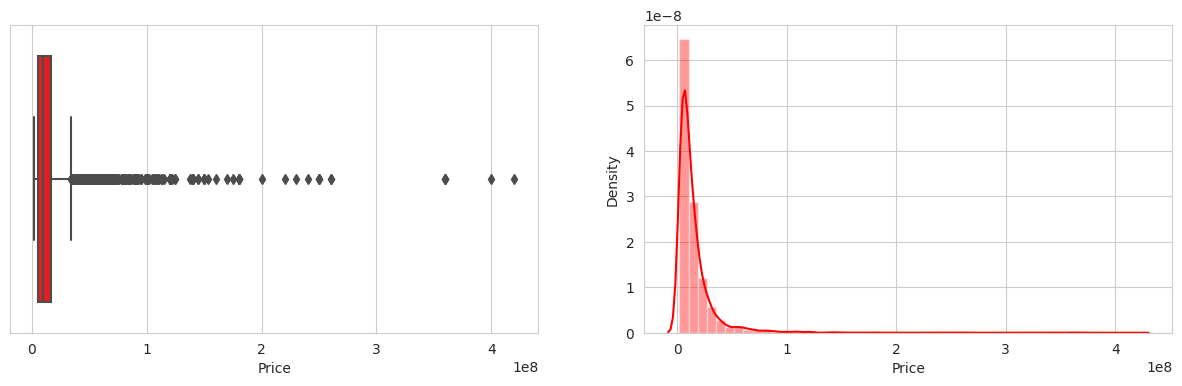

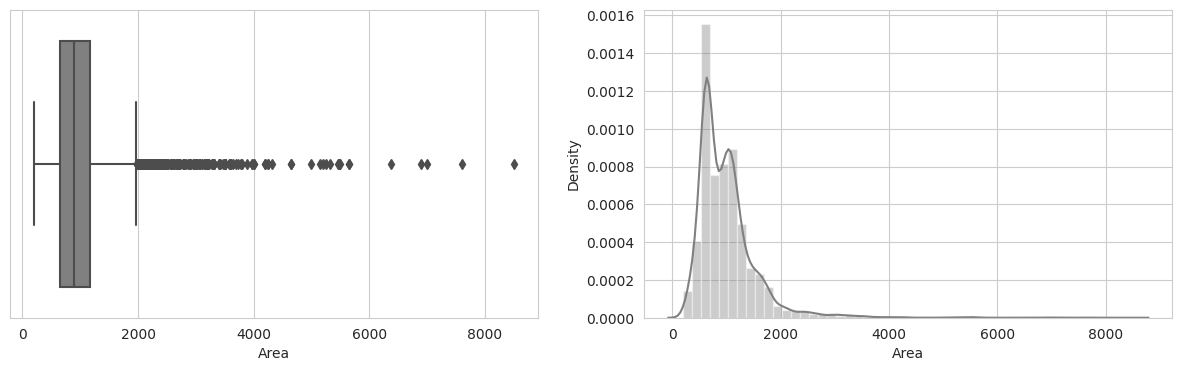

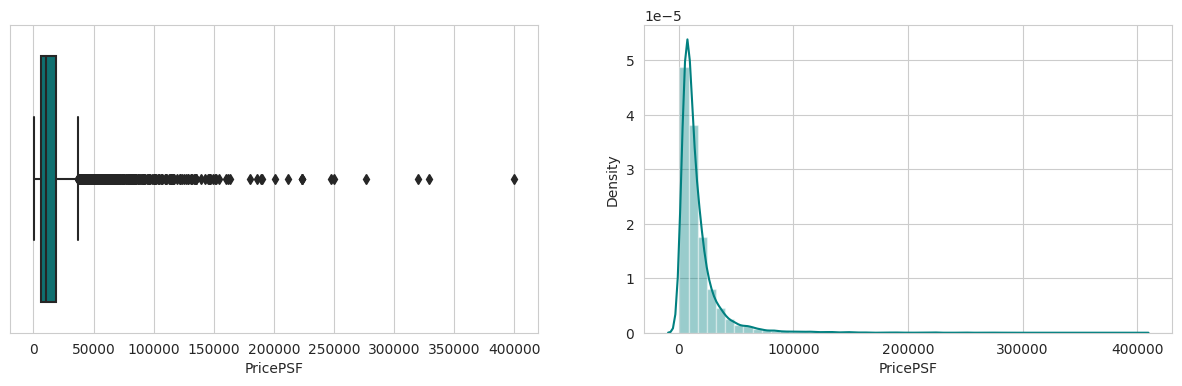

In [583]:
def dist_plot (feature, color, position=121):
    plt.figure(figsize=(15,4))
    plt.subplot(position)
    sns.boxplot(x=feature, data=mumbai, color=color)
    plt.subplot(position+1)
    sns.distplot(mumbai[feature], color=color)
dist_plot('Price', 'red')
dist_plot('Area', 'grey')
dist_plot('PricePSF', 'teal')

<ipython-input-584-7a21d921fe03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delhi[feature], color=color)
<ipython-input-584-7a21d921fe03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delhi[feature], color=color)
<ipython-input-584-7a21d921fe03>:6: UserWarning: 

`distplot` is a depreca

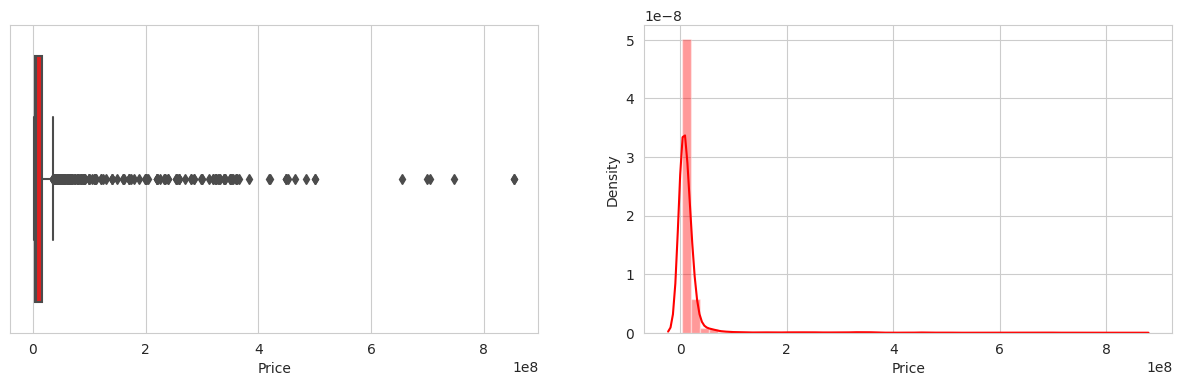

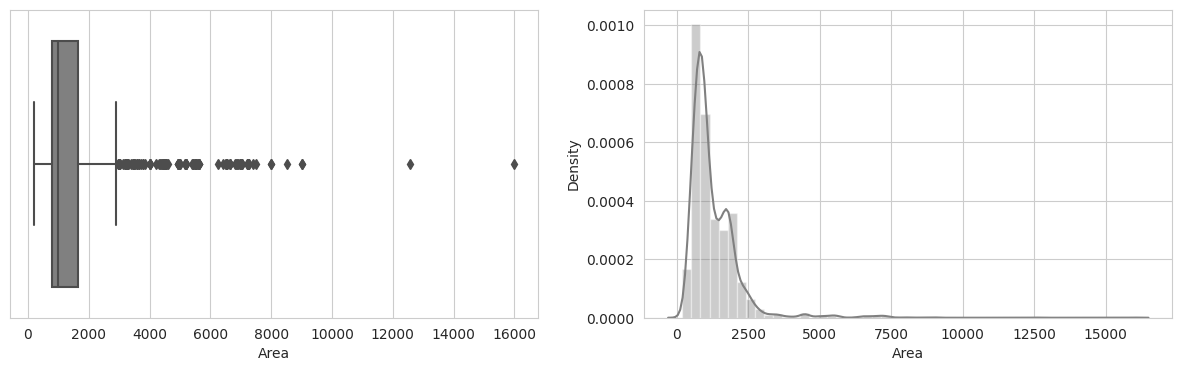

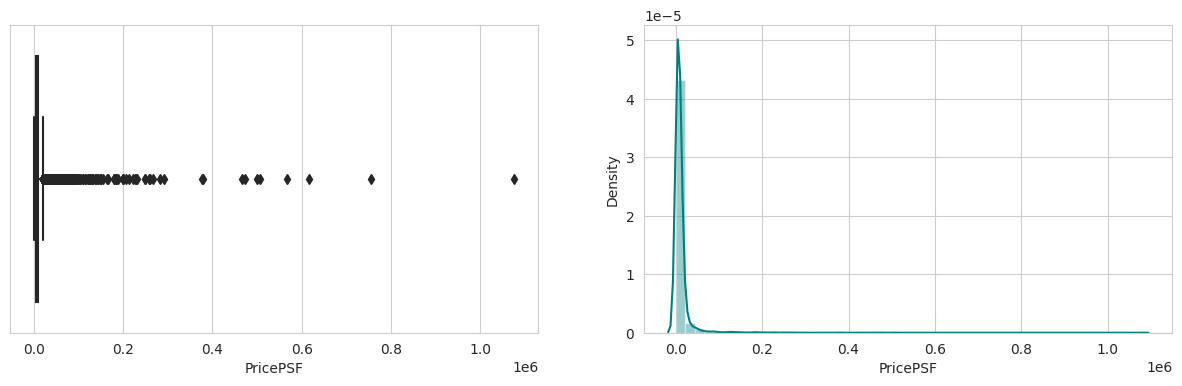

In [584]:
def dist_plot (feature, color, position=121):
    plt.figure(figsize=(15,4))
    plt.subplot(position)
    sns.boxplot(x=feature, data=delhi, color=color)
    plt.subplot(position+1)
    sns.distplot(delhi[feature], color=color)
dist_plot('Price', 'red')
dist_plot('Area', 'grey')
dist_plot('PricePSF', 'teal')

In [585]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

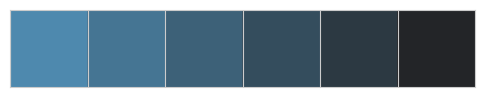

In [586]:
df1 = sns.dark_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(df1),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

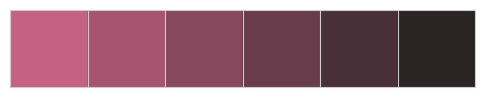

In [587]:
df2 = sns.dark_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(df2),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [588]:
mumbai.replace(9, np.nan, inplace=True)
delhi.replace(9, np.nan, inplace=True)

In [589]:
mumbai = mumbai.dropna()
delhi = delhi.dropna()

In [590]:
mumbai.shape

(1398, 41)

In [591]:
delhi.shape

(2002, 41)

In [592]:
mumbai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 0 to 1397
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                1398 non-null   int64  
 1   Area                 1398 non-null   int64  
 2   Location             1398 non-null   object 
 3   No. of Bedrooms      1398 non-null   int64  
 4   Resale               1398 non-null   int64  
 5   MaintenanceStaff     1398 non-null   float64
 6   Gymnasium            1398 non-null   float64
 7   SwimmingPool         1398 non-null   float64
 8   LandscapedGardens    1398 non-null   float64
 9   JoggingTrack         1398 non-null   float64
 10  RainWaterHarvesting  1398 non-null   float64
 11  IndoorGames          1398 non-null   float64
 12  ShoppingMall         1398 non-null   float64
 13  Intercom             1398 non-null   float64
 14  SportsFacility       1398 non-null   float64
 15  ATM                  1398 non-null   f

In [593]:
delhi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 2001
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                2002 non-null   int64  
 1   Area                 2002 non-null   int64  
 2   Location             2002 non-null   object 
 3   No. of Bedrooms      2002 non-null   int64  
 4   Resale               2002 non-null   int64  
 5   MaintenanceStaff     2002 non-null   float64
 6   Gymnasium            2002 non-null   float64
 7   SwimmingPool         2002 non-null   float64
 8   LandscapedGardens    2002 non-null   float64
 9   JoggingTrack         2002 non-null   float64
 10  RainWaterHarvesting  2002 non-null   float64
 11  IndoorGames          2002 non-null   float64
 12  ShoppingMall         2002 non-null   float64
 13  Intercom             2002 non-null   float64
 14  SportsFacility       2002 non-null   float64
 15  ATM                  2002 non-null   f

<ipython-input-584-7a21d921fe03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delhi[feature], color=color)
<ipython-input-584-7a21d921fe03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delhi[feature], color=color)
<ipython-input-584-7a21d921fe03>:6: UserWarning: 

`distplot` is a depreca

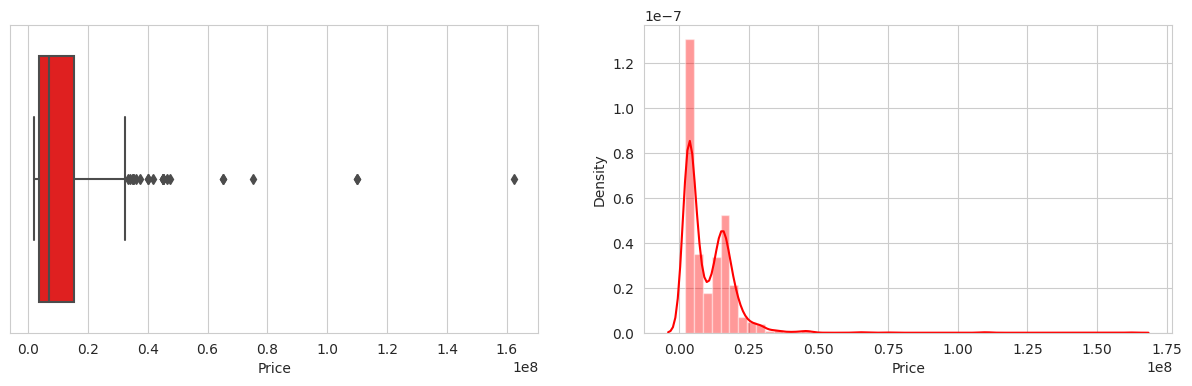

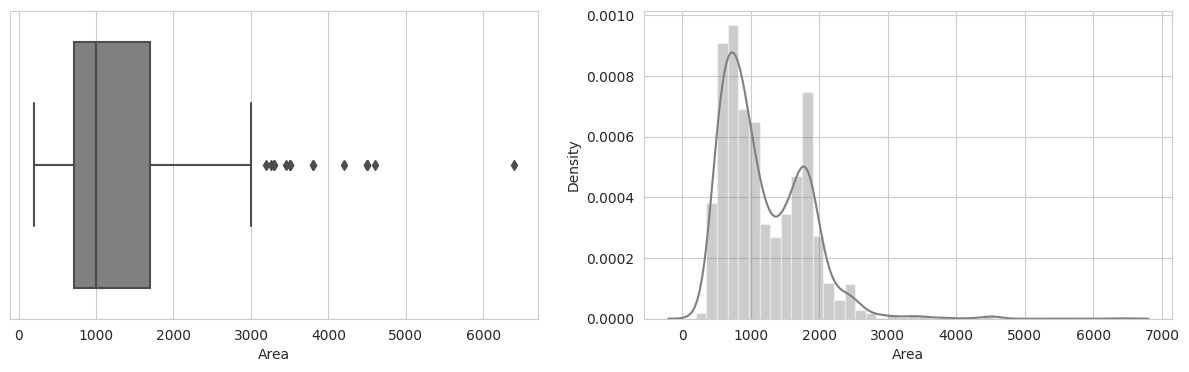

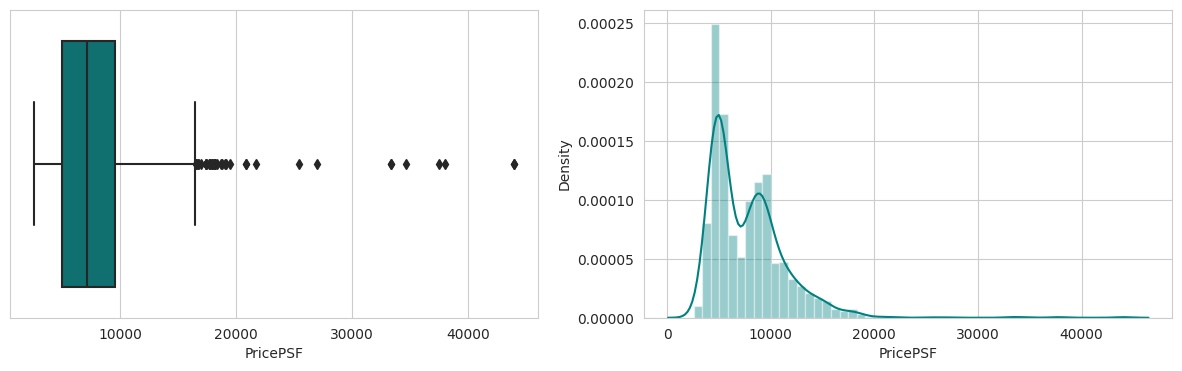

In [594]:
# define outliers
price_psf_outliers = np.percentile(mumbai.PricePSF, [5,90])
price_outliers = np.percentile(mumbai.Price, [5,90])
area_outliers = np.percentile(mumbai.Area, [5,90])
# create filters based on outliers
price_psf_filter = (mumbai.PricePSF > price_psf_outliers[0]) & (mumbai.PricePSF < price_psf_outliers[1])
price_filter = (mumbai.Price > price_outliers[0]) & (mumbai.Price < price_outliers[1])
area_filter = (mumbai.Area > area_outliers[0]) & (mumbai.Area < area_outliers[1])
# apply filters
mumbai = mumbai[(price_psf_filter) & (price_filter) & (area_filter)]
dist_plot('Price', 'red')
dist_plot('Area', 'grey')
dist_plot('PricePSF', 'teal')

<ipython-input-584-7a21d921fe03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delhi[feature], color=color)
<ipython-input-584-7a21d921fe03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delhi[feature], color=color)
<ipython-input-584-7a21d921fe03>:6: UserWarning: 

`distplot` is a depreca

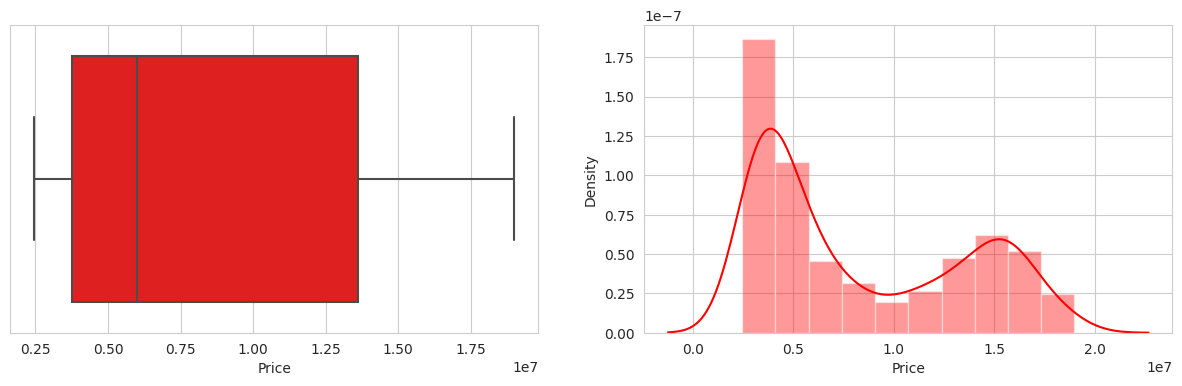

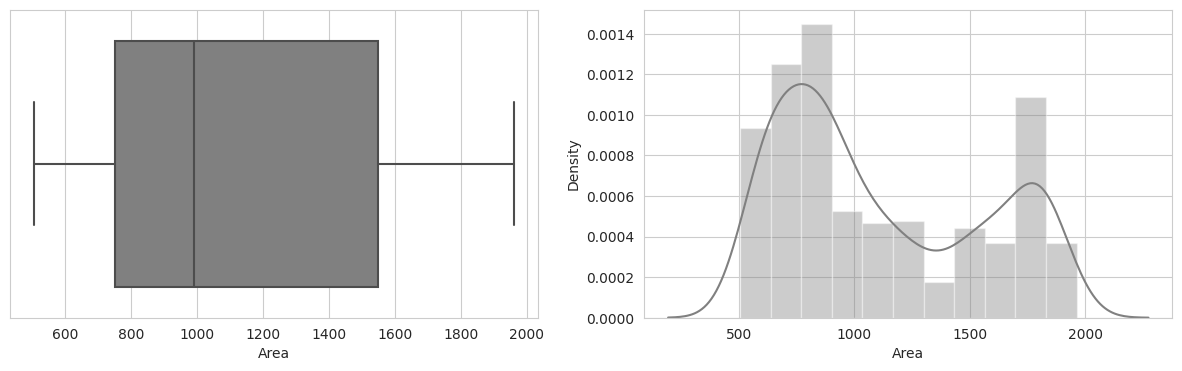

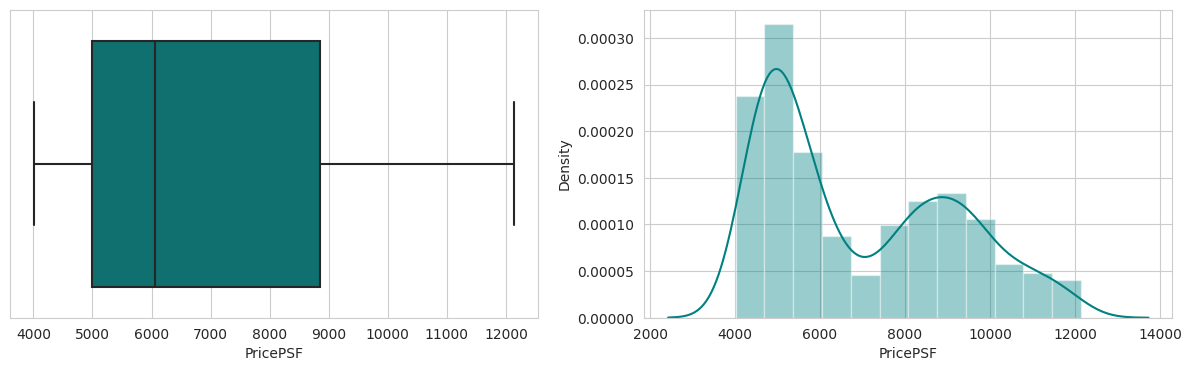

In [595]:
# define outliers
price_psf_outliers = np.percentile(delhi.PricePSF, [5,90])
price_outliers = np.percentile(delhi.Price, [5,90])
area_outliers = np.percentile(delhi.Area, [5,90])
# create filters based on outliers
price_psf_filter = (delhi.PricePSF > price_psf_outliers[0]) & (delhi.PricePSF < price_psf_outliers[1])
price_filter = (delhi.Price > price_outliers[0]) & (delhi.Price < price_outliers[1])
area_filter = (delhi.Area > area_outliers[0]) & (delhi.Area < area_outliers[1])
# apply filters
delhi = delhi[(price_psf_filter) & (price_filter) & (area_filter)]
dist_plot('Price', 'red')
dist_plot('Area', 'grey')
dist_plot('PricePSF', 'teal')

In [596]:
mumbai.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'PricePSF'],
      dtype='object')

In [597]:
delhi.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'PricePSF'],
      dtype='object')

In [598]:
mumbai.rename(columns={'No. of Bedrooms':'Bedrooms', "Children'splayarea":'PlayArea'}, inplace=True)

In [599]:
delhi.rename(columns={'No. of Bedrooms':'Bedrooms', "Children'splayarea":'PlayArea'}, inplace=True)

In [600]:
# assign weights to features
feature_dict_mumbai = {'MaintenanceStaff':2, 'Gymnasium':1, 'SwimmingPool':1,'LandscapedGardens':0, 
                'JoggingTrack':1, 'RainWaterHarvesting':2,'IndoorGames':3, 'ShoppingMall':2, 
                'Intercom':4, 'SportsFacility':2, 'ATM':0, 'ClubHouse':2, 'School':3, 
                '24X7Security':4, 'PowerBackup':4, 'CarParking':4, 'StaffQuarter':0, 'Cafeteria':1, 
                'MultipurposeRoom':2, 'Hospital':4, 'WashingMachine':0, 'Gasconnection':2, 'AC':1, 
                'Wifi':2, 'PlayArea':3, 'LiftAvailable':3, 'BED':0, 'VaastuCompliant':2, 'Microwave':0, 
                'GolfCourse':0, 'TV':0, 'DiningTable':0, 'Sofa':0, 'Wardrobe':0, 'Refrigerator':0}

In [601]:
# convert to Dataframe
feature_mumbai = pd.DataFrame(feature_dict_mumbai.items(), columns=['Features', 'Weight'])
feature_mumbai

,Features,Weight
0,MaintenanceStaff,2
1,Gymnasium,1
2,SwimmingPool,1
3,LandscapedGardens,0
4,JoggingTrack,1
5,RainWaterHarvesting,2
6,IndoorGames,3
7,ShoppingMall,2
8,Intercom,4
9,SportsFacility,2


In [602]:
feature_dict_delhi = {'MaintenanceStaff':2, 'Gymnasium':3, 'SwimmingPool':2,'LandscapedGardens':1, 
                'JoggingTrack':2, 'RainWaterHarvesting':3,'IndoorGames':3, 'ShoppingMall':2, 
                'Intercom':3, 'SportsFacility':1, 'ATM':0, 'ClubHouse':1, 'School':2, 
                '24X7Security':4, 'PowerBackup':4, 'CarParking':4, 'StaffQuarter':0, 'Cafeteria':2, 
                'MultipurposeRoom':3, 'Hospital':3, 'WashingMachine':0, 'Gasconnection':3, 'AC':3, 
                'Wifi':3, 'PlayArea':3, 'LiftAvailable':2, 'BED':1, 'VaastuCompliant':1, 'Microwave':0, 
                'GolfCourse':0, 'TV':0, 'DiningTable':0, 'Sofa':0, 'Wardrobe':0, 'Refrigerator':0}

In [603]:
# convert to Dataframe
feature_delhi = pd.DataFrame(feature_dict_delhi.items(), columns=['Features', 'Weight'])
feature_delhi

,Features,Weight
0,MaintenanceStaff,2
1,Gymnasium,3
2,SwimmingPool,2
3,LandscapedGardens,1
4,JoggingTrack,2
5,RainWaterHarvesting,3
6,IndoorGames,3
7,ShoppingMall,2
8,Intercom,3
9,SportsFacility,1


In [604]:
features_matrix_mumbai = mumbai[['MaintenanceStaff', 'Gymnasium', 'SwimmingPool',
       'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting',
       'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM',
       'ClubHouse', 'School', '24X7Security', 'PowerBackup', 'CarParking',
       'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 'Hospital',
       'WashingMachine', 'Gasconnection', 'AC', 'Wifi', 'PlayArea',
       'LiftAvailable', 'BED', 'VaastuCompliant', 'Microwave',
       'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator']]
features_matrix_mumbai.tail()

,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
1390,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1392,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1395,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [605]:
features_matrix_delhi = delhi[['MaintenanceStaff', 'Gymnasium', 'SwimmingPool',
       'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting',
       'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM',
       'ClubHouse', 'School', '24X7Security', 'PowerBackup', 'CarParking',
       'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 'Hospital',
       'WashingMachine', 'Gasconnection', 'AC', 'Wifi', 'PlayArea',
       'LiftAvailable', 'BED', 'VaastuCompliant', 'Microwave',
       'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator']]
features_matrix_delhi.tail()

,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
1997,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [606]:
# apply dot product to compute feature score for every row
feature_scores_mumbai = np.dot(features_matrix_mumbai, feature_mumbai['Weight'])

In [607]:
# apply dot product to compute feature score for every row
feature_scores_delhi = np.dot(features_matrix_delhi, feature_delhi['Weight'])

In [608]:
# join feature scores column with bangalore dataframe
mumbai['FeatureScore_Mumbai'] = feature_scores_mumbai
mumbai.head()

,Price,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,PricePSF,FeatureScore_Mumbai
0,4850000,720,Kharghar,1,1,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6736.111111,19.0
1,4500000,600,Kharghar,1,1,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7500.000000,26.0
2,6700000,650,Kharghar,1,1,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10307.692308,33.0
3,4500000,650,Kharghar,1,1,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6923.076923,28.0
4,5000000,665,Kharghar,1,1,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7518.796992,25.0


In [609]:
# join feature scores column with bangalore dataframe
delhi['FeatureScore_Delhi'] = feature_scores_delhi
delhi.head()

,Price,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,PricePSF,FeatureScore_Delhi
0,10500000,1200,Sector 10 Dwarka,2,1,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8750.000000,30.0
1,6000000,1000,Uttam Nagar,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6000.000000,11.0
2,15000000,1350,Sarita Vihar,2,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11111.111111,0.0
4,5800000,900,Dwarka Mor,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6444.444444,6.0
5,15800000,1800,Sector 7 Dwarka,4,1,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8777.777778,35.0


<Axes: >

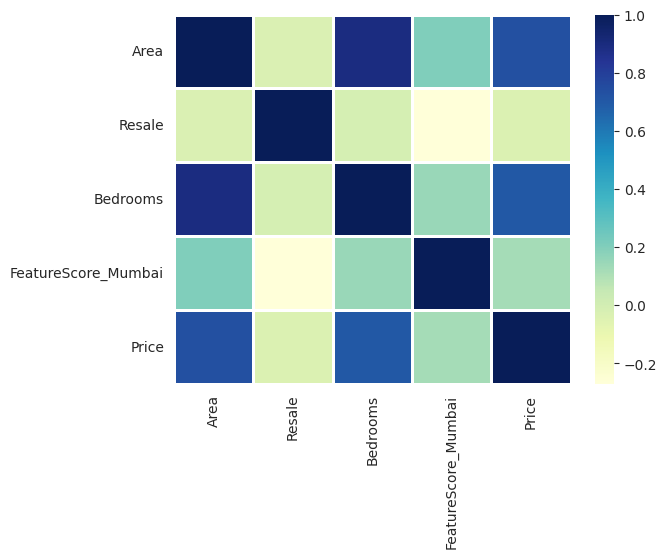

In [610]:
corr_df = mumbai[['Area', 'Resale', 'Bedrooms', 'FeatureScore_Mumbai', 'Price']]
sns.heatmap(corr_df.corr(method='pearson'), cmap='YlGnBu', linewidths=2)

<Axes: >

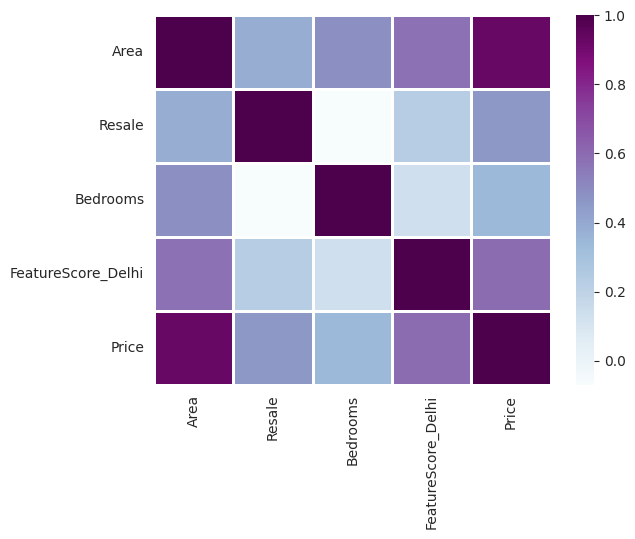

In [611]:
corr_df = delhi[['Area', 'Resale', 'Bedrooms', 'FeatureScore_Delhi', 'Price']]
sns.heatmap(corr_df.corr(method='pearson'), cmap='BuPu', linewidths=2)

In [612]:
# Create a pivot table of Locations with PricePSF as the value
location_pivot_mumbai = pd.pivot_table(data=mumbai, index='Location', aggfunc='mean', values='PricePSF')
location_pivot_mumbai

,PricePSF
Location,
Airoli,11100.730338
Ambernath East,5306.849315
Andheri,12434.137291
Andheri East,14877.118837
Badlapur West,5149.650350
...,...
no 9,19259.259259
raheja vihar,18351.709402
taloja panchanand,6948.397998


In [613]:
# Create a pivot table of Locations with PricePSF as the value
location_pivot_delhi = pd.pivot_table(data=delhi, index='Location', aggfunc='mean', values='PricePSF')
location_pivot_delhi

,PricePSF
Location,
Alaknanda,10222.436484
Babarpur,6040.723982
Bindapur,5177.732564
Budh Vihar,7328.703704
Burari,4786.560505
...,...
Vasant Kunj,9158.511016
West Sagarpur,5833.333333
greater kailash Enclave 1,11515.151515


In [614]:
location_pivot_mumbai['LocationPremium_Mumbai'] = location_pivot_mumbai['PricePSF'] / location_pivot_mumbai['PricePSF'].min()
location_pivot_mumbai.sort_values('LocationPremium_Mumbai', ascending=False)

,PricePSF,LocationPremium_Mumbai
Location,,
Vivek Vidyalaya Marg,20000.000000,4.060606
no 9,19259.259259,3.910213
Samata Nagar Thakur Village,19259.259259,3.910213
Mahatma Gandhi Road,19200.000000,3.898182
raheja vihar,18351.709402,3.725953
...,...,...
Ambernath East,5306.849315,1.077451
Vasai east,5197.132616,1.055175
Badlapur West,5149.650350,1.045535


In [615]:
location_pivot_delhi['LocationPremium_Delhi'] = location_pivot_delhi['PricePSF'] / location_pivot_delhi['PricePSF'].min()
location_pivot_delhi.sort_values('LocationPremium_Delhi', ascending=False)

,PricePSF,LocationPremium_Delhi
Location,,
Sector-14 Rohini,12000.000000,2.981082
Sector 9 Rohini,11692.307692,2.904644
greater kailash Enclave 1,11515.151515,2.860634
Chittaranjan Park,11428.571429,2.839125
Greater Kailash,11185.185185,2.778662
...,...,...
mayur vihar phase 1,4666.666667,1.159310
Govindpuri,4578.546391,1.137418
SULTANPUR,4266.666667,1.059940


In [616]:
mumbai = pd.merge(mumbai, location_pivot_mumbai['LocationPremium_Mumbai'], on='Location')
mumbai

,Price,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,PricePSF,FeatureScore_Mumbai,LocationPremium_Mumbai
0,4850000,720,Kharghar,1,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6736.111111,19.0,1.732164
1,4500000,600,Kharghar,1,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7500.000000,26.0,1.732164
2,6700000,650,Kharghar,1,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10307.692308,33.0,1.732164
3,4500000,650,Kharghar,1,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6923.076923,28.0,1.732164
4,5000000,665,Kharghar,1,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7518.796992,25.0,1.732164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,6300000,750,Thakurli,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8400.000000,11.0,1.705455
1003,7600000,550,Shakti Nagar,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13818.181818,4.0,2.805510
1004,6500000,566,Dahisar East,1,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11484.098940,21.0,2.331620
1005,17500000,1188,Ghatkopar West,2,1,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14730.639731,24.0,2.990766


In [617]:
delhi = pd.merge(delhi, location_pivot_delhi['LocationPremium_Delhi'], on='Location')
delhi

,Price,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,PricePSF,FeatureScore_Delhi,LocationPremium_Delhi
0,10500000,1200,Sector 10 Dwarka,2,1,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8750.000000,30.0,2.286678
1,10500000,1200,Sector 10 Dwarka,2,1,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8750.000000,30.0,2.286678
2,16200000,1600,Sector 10 Dwarka,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10125.000000,0.0,2.286678
3,17000000,1900,Sector 10 Dwarka,3,1,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8947.368421,32.0,2.286678
4,15500000,1600,Sector 10 Dwarka,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9687.500000,16.0,2.286678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,9400000,1000,Rohini Sector 9,2,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9400.000000,0.0,2.496656
1342,10700000,1000,Rohini Sector 9,2,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10700.000000,8.0,2.496656
1343,3600000,650,Dashrath Puri,2,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5538.461538,8.0,1.375884
1344,5500000,900,Nasirpur,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6111.111111,8.0,1.518143


In [618]:
mumbai['LogPremium_Mumbai'] = np.log(mumbai['LocationPremium_Mumbai'])
# check if all required columns are present
mumbai

,Price,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,PricePSF,FeatureScore_Mumbai,LocationPremium_Mumbai,LogPremium_Mumbai
0,4850000,720,Kharghar,1,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6736.111111,19.0,1.732164,0.549371
1,4500000,600,Kharghar,1,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7500.000000,26.0,1.732164,0.549371
2,6700000,650,Kharghar,1,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10307.692308,33.0,1.732164,0.549371
3,4500000,650,Kharghar,1,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,6923.076923,28.0,1.732164,0.549371
4,5000000,665,Kharghar,1,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7518.796992,25.0,1.732164,0.549371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,6300000,750,Thakurli,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8400.000000,11.0,1.705455,0.533832
1003,7600000,550,Shakti Nagar,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13818.181818,4.0,2.805510,1.031585
1004,6500000,566,Dahisar East,1,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11484.098940,21.0,2.331620,0.846563
1005,17500000,1188,Ghatkopar West,2,1,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14730.639731,24.0,2.990766,1.095530


In [619]:
delhi['LogPremium_Delhi'] = np.log(delhi['LocationPremium_Delhi'])
delhi

,Price,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,PricePSF,FeatureScore_Delhi,LocationPremium_Delhi,LogPremium_Delhi
0,10500000,1200,Sector 10 Dwarka,2,1,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8750.000000,30.0,2.286678,0.827100
1,10500000,1200,Sector 10 Dwarka,2,1,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8750.000000,30.0,2.286678,0.827100
2,16200000,1600,Sector 10 Dwarka,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10125.000000,0.0,2.286678,0.827100
3,17000000,1900,Sector 10 Dwarka,3,1,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8947.368421,32.0,2.286678,0.827100
4,15500000,1600,Sector 10 Dwarka,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9687.500000,16.0,2.286678,0.827100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,9400000,1000,Rohini Sector 9,2,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9400.000000,0.0,2.496656,0.914952
1342,10700000,1000,Rohini Sector 9,2,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10700.000000,8.0,2.496656,0.914952
1343,3600000,650,Dashrath Puri,2,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5538.461538,8.0,1.375884,0.319096
1344,5500000,900,Nasirpur,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6111.111111,8.0,1.518143,0.417488


In [620]:
feature_names_mumbai = ['Area','Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'PlayArea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']
feature_names_delhi = ['Area','Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'PlayArea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']

X_m = mumbai[feature_names_mumbai]
y_m = mumbai['Price']
X_d = delhi[feature_names_delhi]
y_d = delhi['Price']

In [621]:
def split(X,y):
  train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.2)
  return train_X, test_X, train_y, test_y

train_X_m, test_X_m, train_y_m, test_y_m = split(X_m,y_m)
train_X_d, test_X_d, train_y_d, test_y_d = split(X_d,y_d)

model = RandomForestRegressor().fit(train_X_m, train_y_m)

In [622]:
model2_mumbai = DecisionTreeRegressor(random_state=0, max_depth=1, min_samples_split=5).fit(train_X_m, train_y_m)

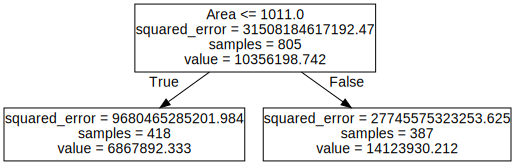

<Figure size 1000x600 with 0 Axes>

In [623]:
import graphviz
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
tree_graph = tree.export_graphviz(model2_mumbai, out_file=None, feature_names=feature_names_mumbai)
graphviz.Source(tree_graph)


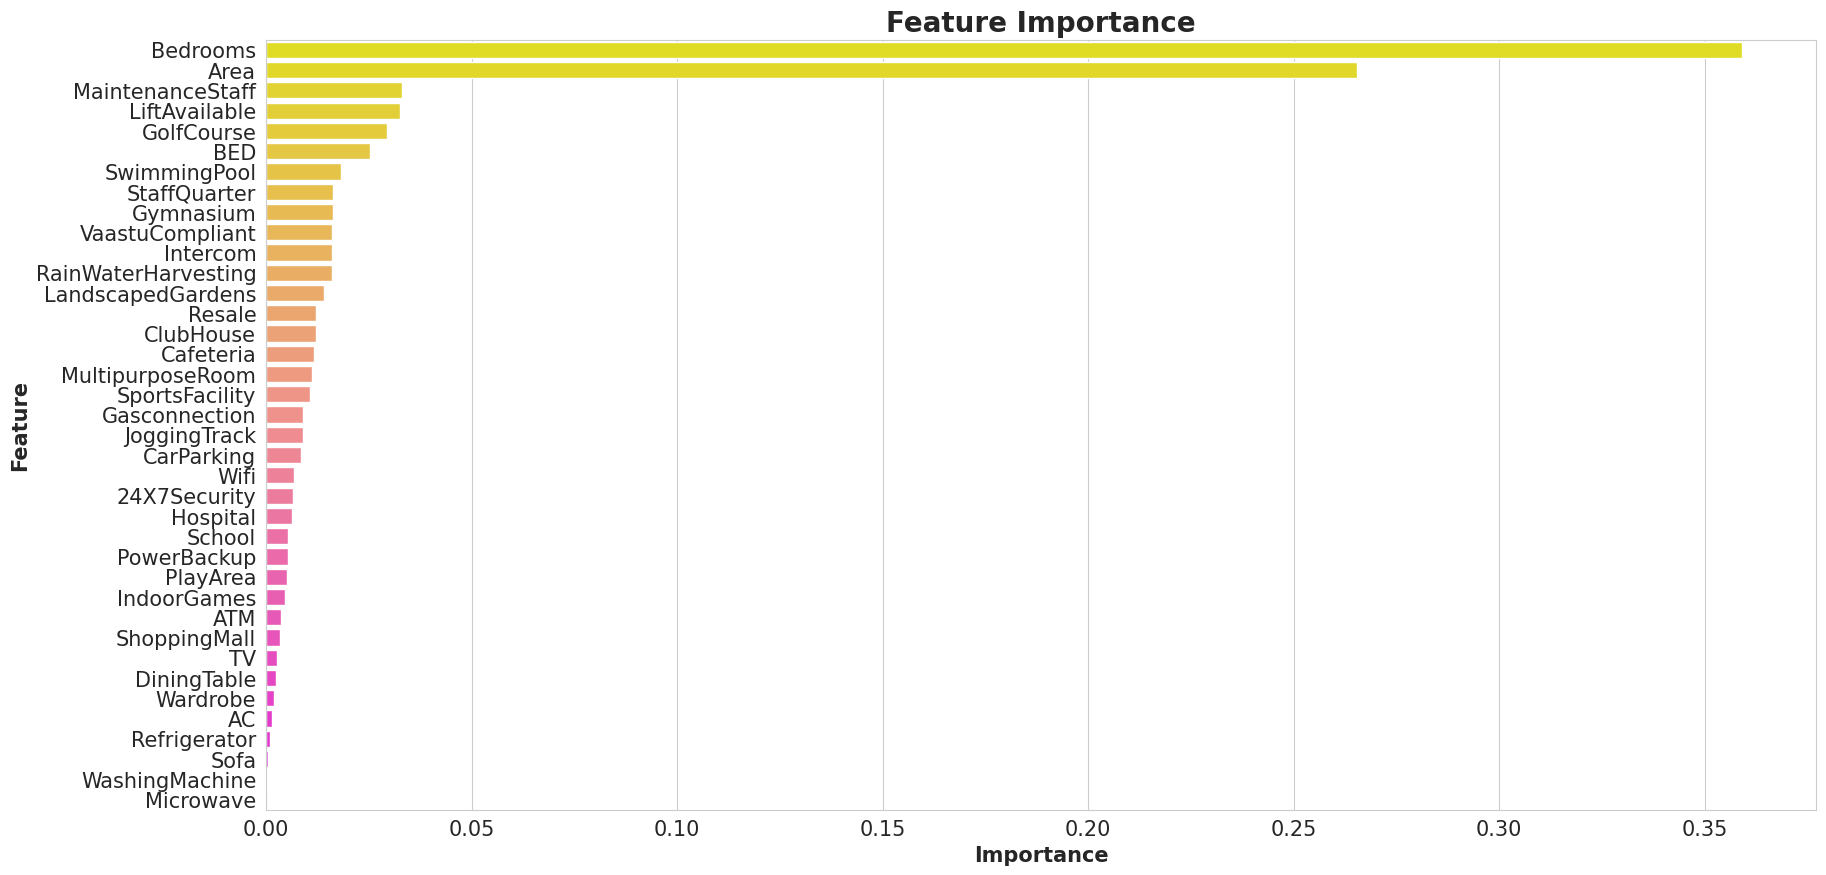

In [624]:
model3 = ExtraTreesRegressor()
model3.fit(train_X_m, train_y_m)
fi = pd.DataFrame(model3.feature_importances_,
             columns=['importance'])
fi['feature'] = feature_names_mumbai
fi = fi.sort_values('importance', ascending=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=fi, x='importance', y='feature',
                 palette="spring_r")
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xlabel('Importance',fontsize=15, weight="bold");
ax.set_ylabel('Feature',fontsize=15,weight="bold");
plt.title("Feature Importance", size=20, weight="bold");

In [625]:
feature_names_delhi = ['Area','Bedrooms','MaintenanceStaff','24X7Security','VaastuCompliant','LiftAvailable']

X = delhi[feature_names_delhi]
y = delhi['Price']

train_X_d, val_X_d, train_y_d, val_y_d = train_test_split(X, y, random_state=1, test_size=0.2)

In [626]:
def train_model(m,name):
    model = m
    model.fit(X=train_X_d, y=train_y_d)
    predictions = model.predict(val_X_d)
    mae = mean_absolute_error(val_y_d, predictions)
    r2 = r2_score(val_y_d, predictions)
    print("{0} mae {1} r2 {2}".format(name,mae,r2))
    return predictions

predictions1 = train_model(DecisionTreeRegressor(),"Decision Tree Regressor")
predictions2 = train_model(RandomForestRegressor(),"Random Forest Regressor")   
predictions3 = train_model(XGBRegressor(n_estimators=600),"XGBoost Regressor") 
print(predictions1) 

Decision Tree Regressor mae 1082152.5792241627 r2 0.8805899908736687
Random Forest Regressor mae 1056695.132852315 r2 0.8900375745589407
XGBoost Regressor mae 1095565.411111111 r2 0.879486222722813
[16500000.          2694900.         11500000.         15800000.
 10966666.66666667  3400000.          4249500.          9487500.
  3800000.         15100000.          2650000.          4960142.85714286
  3900000.          7333333.33333333  4100000.         15075000.
 15578571.42857143 13233332.66666667  2899250.          9160000.
 11500000.         16233333.33333333 14750000.          4980563.63636364
 14768421.          2600000.          3499333.33333333  3479250.
 11060000.          4666666.66666667  4960142.85714286  2770200.
  7000000.          4980563.63636364 15586538.44230769  7290909.09090909
 10085714.28571429  6799499.5         8500000.         15075000.
  6000000.          4566555.55555556 14260000.         15557894.73684211
  5450000.         13740000.          4666666.66666667 

In [627]:
model = sm.OLS(train_y_d, train_X_d).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              5292.
Date:                Tue, 25 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:37:38   Log-Likelihood:                         -17009.
No. Observations:                1076   AIC:                                  3.403e+04
Df Residuals:                    1070   BIC:                                  3.406e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Area              1.185e+04    152.609     77.653      0.000    1.16e+04    1.22e+04
Bedrooms         -1.637e+06   7.23e+04    -22.647      0.000   -1.78e+06    -1.5e+06
MaintenanceStaff  -1.68e+05   2.35e+05     -0.714      0.475    -6.3e+05    2.94e+05
24X7Security      2.643e+05   2.79e+05      0.948      0.344   -2.83e+05    8.11e+05
VaastuCompliant  -2.479e+04   1.67e+05     -0.149      0.882   -3.52e+05    3.02e+05
LiftAvailable    -5.417e+05   1.18e+05     -4.591      0.000   -7.73e+05    -3.1e+05
==============================================================================
Omnibus:                       58.652   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.477
Skew:                           0.165   Prob(JB):                     1.95e-41
Kurtosis:                       5.018   Cond. No.                     7.08e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [628]:
model1 = DecisionTreeRegressor()
model1.fit(train_X_d, train_y_d)

DecisionTreeRegressor()

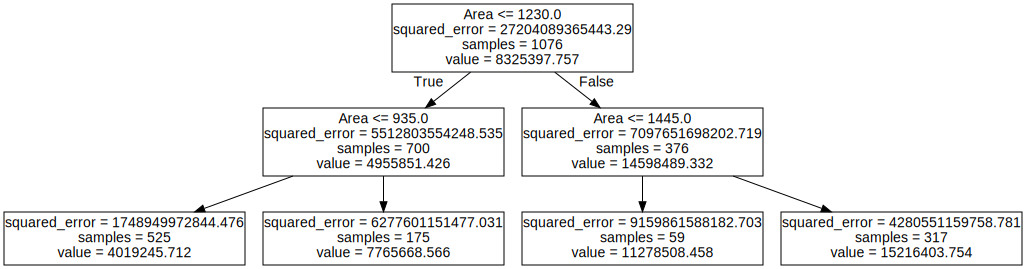

In [651]:
model1 = DecisionTreeRegressor(random_state=0, max_depth=2, min_samples_split=5).fit(train_X_d, train_y_d)
tree_graph = tree.export_graphviz(model1, out_file=None, feature_names=feature_names_delhi)
graphviz.Source(tree_graph)

In [632]:
def count_plot(data,title,p):
    df5=data[data['Resale']== 0]
    df6=data[data['Resale']== 1]
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    ax[0]=sns.countplot(y='Location', data=df5, order=df5.Location.value_counts().index[:10],ax=ax[0],palette = p)
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='Location', data=df6, order=df6.Location.value_counts().index[:10],ax=ax[1],palette = p)
    ax[1].set_title('Number of Resale Properties')   
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()


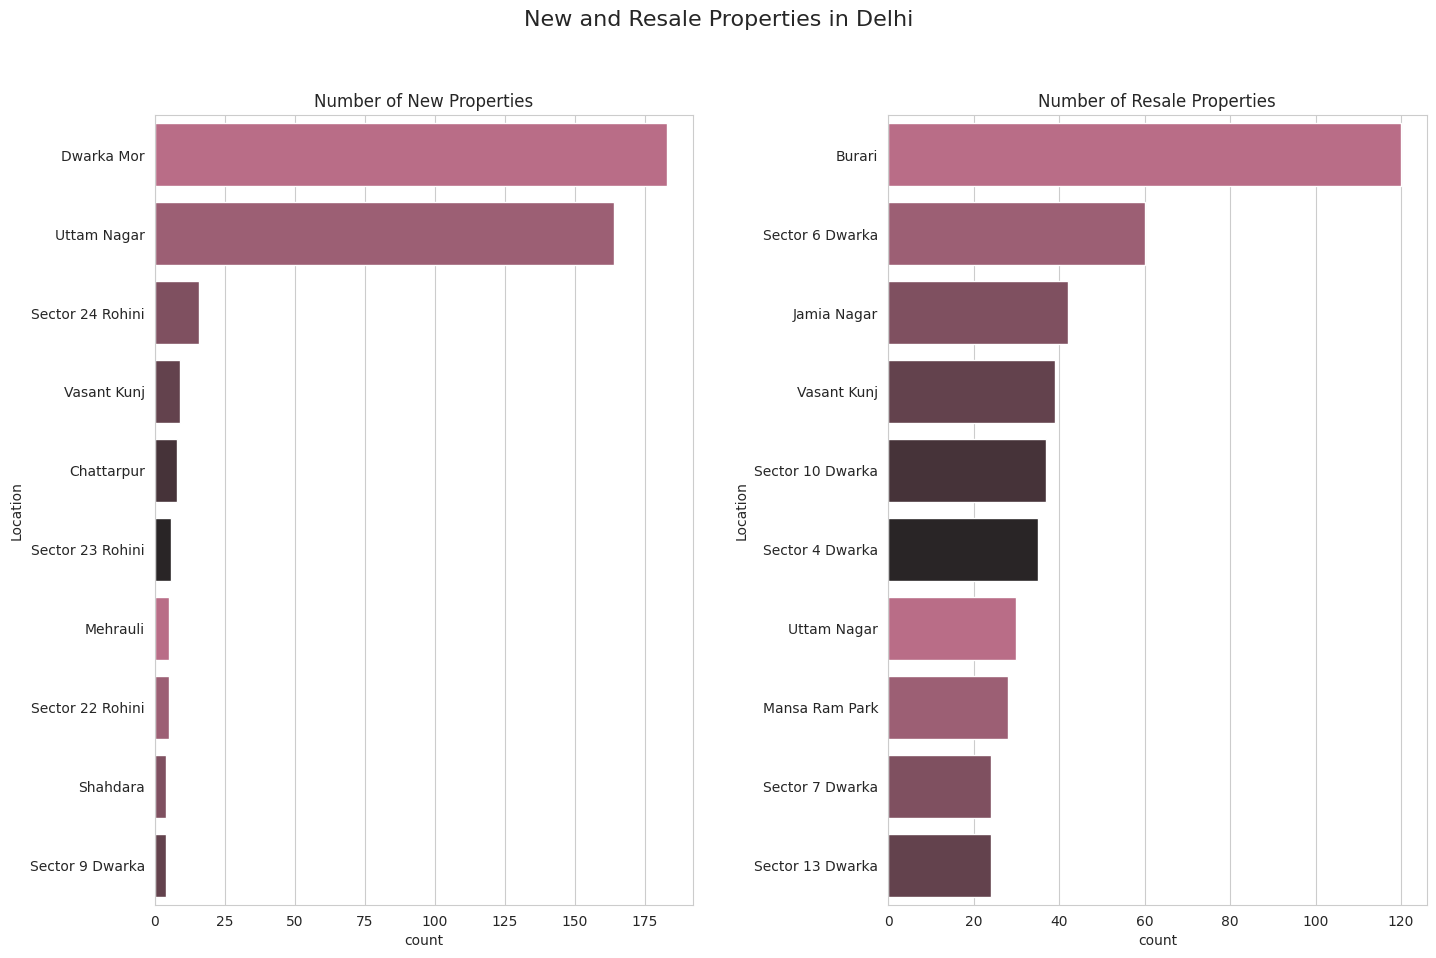

In [633]:
count_plot(delhi,'New and Resale Properties in Delhi',df2)

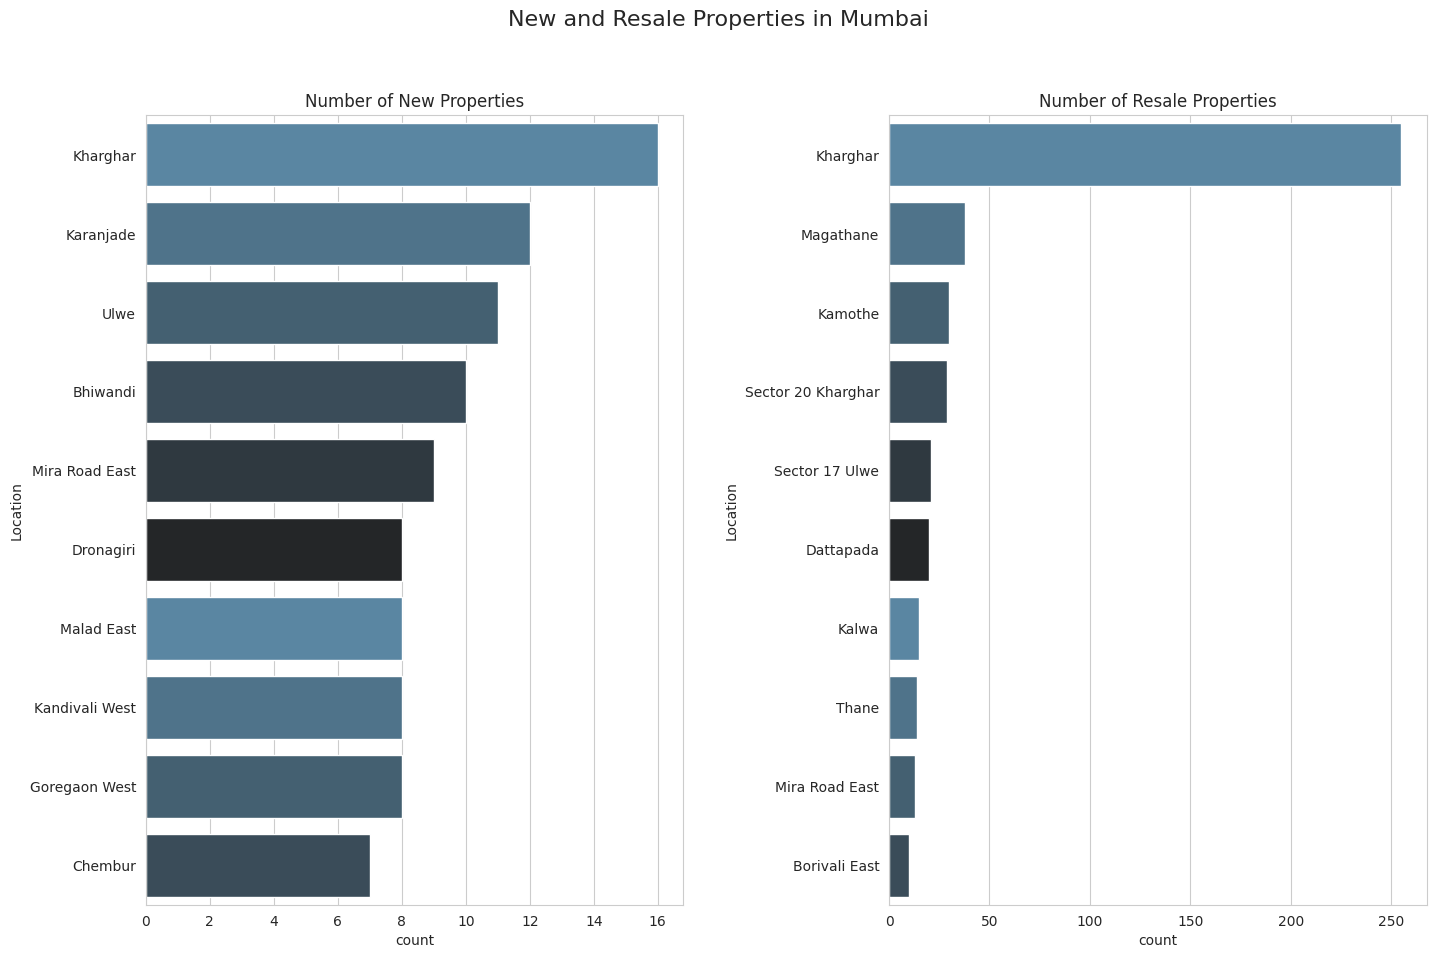

In [634]:
count_plot(mumbai,'New and Resale Properties in Mumbai',df1)

In [635]:
def cat_plot(data,title,p):
    sns.catplot(x="Bedrooms", y="Price", data=mumbai,palette = p)
    plt.title('No. of Bedrooms vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

<ipython-input-635-9f5ef20cb33b>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Bedrooms", y="Price", data=mumbai,palette = p)
<ipython-input-635-9f5ef20cb33b>:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.catplot(x="Bedrooms", y="Price", data=mumbai,palette = p)


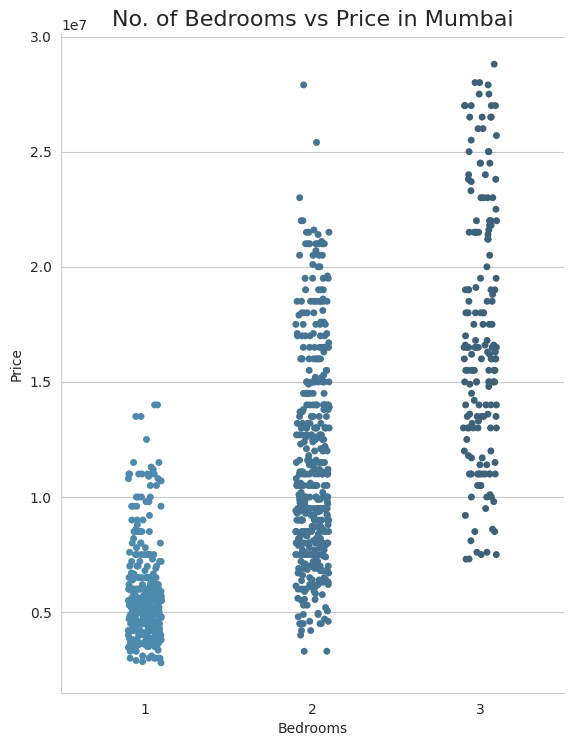

In [636]:
cat_plot(mumbai,'Mumbai',df1)

In [637]:
def cat_plot(data,title,p):
    sns.catplot(x="Bedrooms", y="Price", data=delhi,palette = p)
    plt.title('No. of Bedrooms vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

<ipython-input-637-179a9b42f340>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Bedrooms", y="Price", data=delhi,palette = p)
<ipython-input-637-179a9b42f340>:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.catplot(x="Bedrooms", y="Price", data=delhi,palette = p)


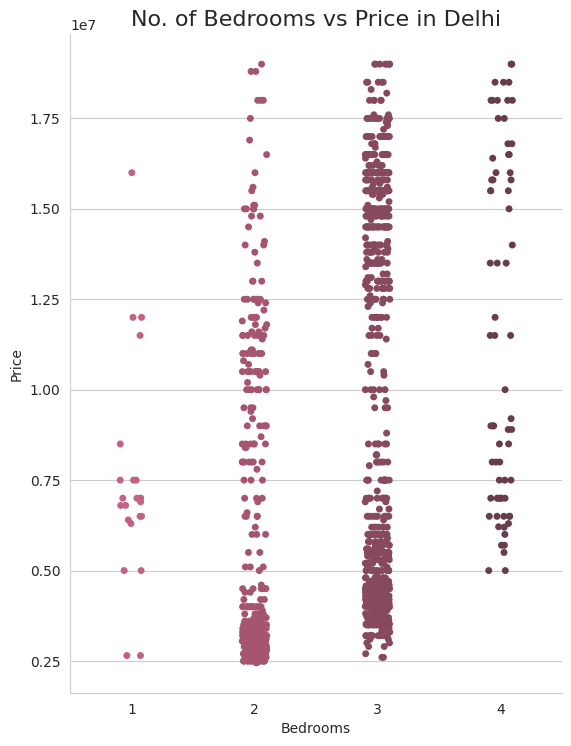

In [638]:
cat_plot(delhi,'Delhi',df2)

In [639]:
def scatter_plot(data,title,c):
    sns.scatterplot(x="Area", y="Price", data=mumbai,color=c,marker="P")
    plt.title('Area in square feet vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

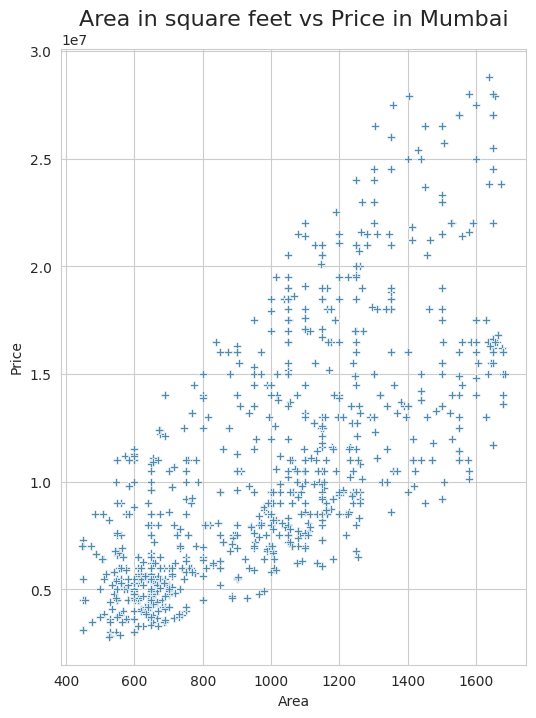

In [640]:
scatter_plot(df1,'Mumbai',custom_colors[0])

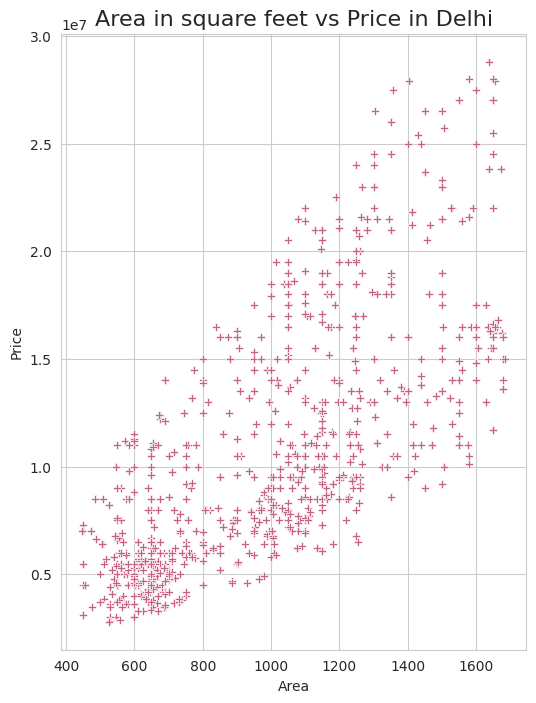

In [641]:
scatter_plot(df2,'Delhi',custom_colors[1])